# **News Summarization**

1. Introduction
2. Loading the data
3. Data Pre-Processing
    - Handling Null (or) NA values
    - Lowecase Transformation
    - Removing HTML tags (if any)
4. Exploratory Data Analysis(EDA)
    - Word Cloud
    - Vocabulary of the Corpus
    - Top 50 Frequent words
    - Top 50 Bigrams and Trigrams
5. Word Embedding
6. LSTM Model
    - Building the model
    - Hyperparameter Tuning
    - Evaluating the model

# ABOUT THE DATA

The main aim of the project is to generate short length descriptions of news articles and summarizing large amount of information which can be represented in compressed space. 

Dataset is from kaggle https://www.kaggle.com/code/rakshithanil/textsummarization-simple-heapq-transformers/data 


# LOADING DATA

In [44]:
# importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.draw.dispersion import dispersion_plot
import re
from nltk.collocations import *
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# tensorflow and keras libraries for word embedding
from tensorflow.keras.preprocessing.text import one_hot


In [ ]:
nltk_stops = nltk.corpus.stopwords.words('english')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/Othercomputers/My Laptop/News-Summarization/cnn_dailymail/train.zip')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in data set-1')

There are 287113 rows and 3 columns in data set-1


In [ ]:
news_summary_df = df.sample(frac=0.20, random_state=1337) # down sampling the data

# approximately considering 5,000 news articles for training the model
news_summary_df.shape

(57423, 3)

In [ ]:
news_summary_df.head()

,id,article,highlights
214243,a1723368fdbd9967eadb574ca9ea0e43e4daee00,This is the dramatic moment a brave jeweller c...,Two armed men broke into the shop in Giardini ...
36488,676dfe98eff68a75fc0e1e073adc7258eaf11e28,(CNN) -- Former Dodgers manager Tommy Lasorda ...,"Tommy Lasorda, 84, is in stable condition in N..."
130973,355b3861837b5c112de5e75f8efc29fb8ffdacdf,By . Jessica Jerreat and Helen Pow . PUBLISHED...,Valerie Rae Bradshaw was found just after 7 p....
284063,fc075b08f5fc2974725e1beb9a2ad1fddb2c81fb,A bigamist was caught by his wife after she sa...,Nicolette Smith disappointed Stephen Smith not...
49483,8bda1f10cb2b0d8a1de8a900d79ea4eed4f85a57,They may resemble magical-looking toadstools o...,Pictures show water droplets splashing into a ...


In [ ]:
news_summary_df.iloc[0,1] # news article

"This is the dramatic moment a brave jeweller confronted armed bandits and booted them out of his shop - giving one a kick in the bottom for good measure. The amazing scenes were caught on a security camera during a hold up in the shop close to Messina in Sicily, the Mafia's island stronghold. Police are using the footage in an attempt to trace the two armed men who burst into the shop. SCROLL DOWN FOR VIDEO . Unsuspecting: The seller opens a cloth bag of jewels for a customer as one of the attackers stands outside the door . Break in: The pair make their way in as the shop keeper continues dealing with the customer while on the phone . In the shots, the unidentified owner . of the store is seen unrolling a cloth bag, containing jewels, with a . customer standing the other side of the counter. As they discuss the items a man is buzzed in and his accomplice quickly slips inside. Within seconds, the first man has pulled a gun out and pointed it at the jeweller. His partner, who is wearin

Articles column contains the articles whereas the highlights column shown below contains the summary



In [ ]:
news_summary_df.iloc[0,2] #summary

"Two armed men broke into the shop in Giardini Naxos, Messina, Sicily .\nThey grabbed a bag of jewels the shop keeper was showing to a customer .\nThe shop keeper pulled out his own gun and chased the pair out .\nHe kicked one out the door .\nThe town is a Mafia stronghold but police have ruled the gang's involvement ."

In [ ]:
news_df = news_summary_df.drop('id', axis=1) # dropped id column since it is irrelevant

In [ ]:
news_df

,article,highlights
214243,This is the dramatic moment a brave jeweller c...,Two armed men broke into the shop in Giardini ...
36488,(CNN) -- Former Dodgers manager Tommy Lasorda ...,"Tommy Lasorda, 84, is in stable condition in N..."
130973,By . Jessica Jerreat and Helen Pow . PUBLISHED...,Valerie Rae Bradshaw was found just after 7 p....
284063,A bigamist was caught by his wife after she sa...,Nicolette Smith disappointed Stephen Smith not...
49483,They may resemble magical-looking toadstools o...,Pictures show water droplets splashing into a ...
...,...,...
112828,"(CNN) -- This season on ""American Idol,"" there...",Adam Lambert has added spice to season eight o...
282808,"Newtown, Connecticut (CNN) -- The center of Ne...",Signs of holiday cheer replaced with calls for...
238561,While digging through a box that belonged to h...,Robert Ondrovic found his father's photos from...
136675,"Marlow Holmes, 39, has been arrested for alleg...","Marlow Holmes, 39, of Dover was stopped by pol..."


# DATA PRE-PROCESSING

#### Handling `null/na` values

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57423 entries, 214243 to 198867
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     57423 non-null  object
 1   highlights  57423 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


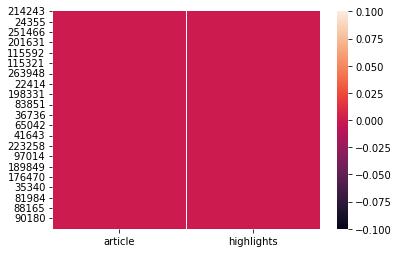

In [ ]:
sns.heatmap(news_df.isna()) # few NA values are present in full text column

In [ ]:
news_df[news_df['article'].isna()]

,article,highlights


No null or na values in the data

#### Lowercase Transformation

In [ ]:
news_df['article'] = news_df['article'].apply(str.lower)
news_df['highlights'] = news_df['highlights'].apply(str.lower)

#### Remove HTML tags (if any)

In [ ]:
from bs4 import BeautifulSoup
def remove_tags(raw_text:str):
  return BeautifulSoup(raw_text, "lxml").text

In [ ]:
news_df['article']=news_df['article'].apply(lambda text : remove_tags(text))

#### Not Removing Stop Words,and No Lemmetaization/Stemming - we do not want to loose the sentence structure since we have to predict grammatical correct sentences

In [ ]:
# data after pre processing
news_df.head()

,article,highlights
214243,this is the dramatic moment a brave jeweller c...,two armed men broke into the shop in giardini ...
36488,(cnn) -- former dodgers manager tommy lasorda ...,"tommy lasorda, 84, is in stable condition in n..."
130973,by . jessica jerreat and helen pow . published...,valerie rae bradshaw was found just after 7 p....
284063,a bigamist was caught by his wife after she sa...,nicolette smith disappointed stephen smith not...
49483,they may resemble magical-looking toadstools o...,pictures show water droplets splashing into a ...


# 3. DATA EXPLORATION (or) CORPUS STATISTICS



In [ ]:
text = ' '.join(news_df['article'])

#### TYPE TOKEN RATIO (TTR) - LEXICAL RICHNESS OF THE CORPUS

A type-token ratio (TTR) is the total number of UNIQUE words (types) divided by the total number of words (tokens) in a given segment of language.

The closer the TTR ratio is to 1, the greater the lexical richness of the segment.

In [ ]:
tokens = nltk.word_tokenize(text)

In [ ]:
total_tokens  = len(tokens) 
unique_tokens = len(set(tokens))

In [ ]:
total_tokens

45139202

In [41]:
unique_tokens

340339

In [ ]:
unique_tokens/total_tokens # ttr ratio

0.007539765545700165

In [ ]:
# removing stop words
tokens = [token for token in tokens if token not in nltk_stops]

In [ ]:
# removing punctuation
tokens = [token for token in tokens if token.isalpha()]

#### Top 20 Frequent words

In [ ]:
fdist = nltk.FreqDist(tokens)
top_tokens = fdist.most_common(20)
top_tokens

[('said', 261572),
 ('one', 90447),
 ('would', 75542),
 ('people', 71747),
 ('also', 70471),
 ('new', 66655),
 ('two', 62631),
 ('last', 58335),
 ('time', 57269),
 ('told', 57256),
 ('police', 53959),
 ('could', 53898),
 ('years', 53538),
 ('first', 52510),
 ('year', 49779),
 ('mr', 48689),
 ('like', 43041),
 ('home', 42290),
 ('world', 40386),
 ('back', 39464)]

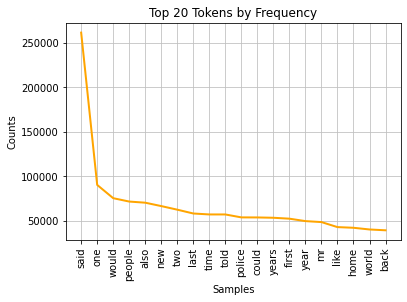

In [ ]:
# frequency plot:
fdist.plot(20, title="Top 20 Tokens by Frequency", color='orange')

#### Word Cloud

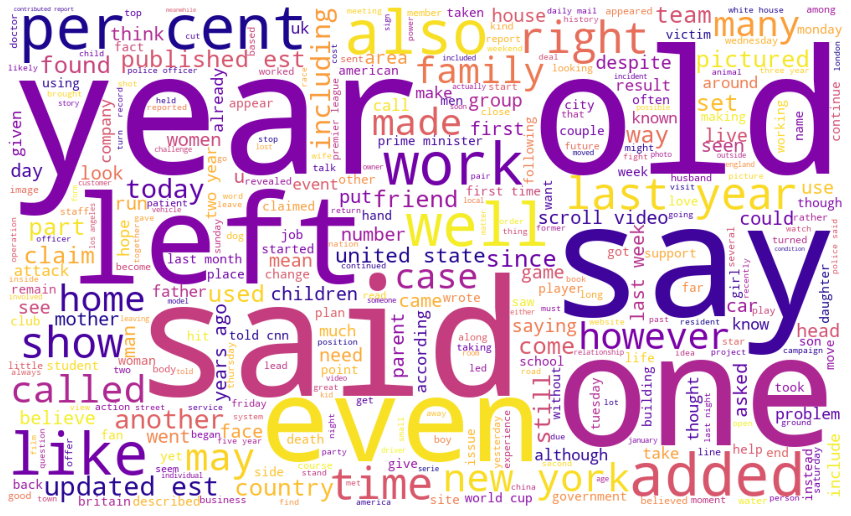

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(stopwords = nltk_stops,
                background_color="white", 
                max_words=350, 
                width=1000, 
                height=600, 
                max_font_size=256,
                random_state=1, colormap='plasma').generate(text)

# plot the wordcloud object
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# visualizing hapaxes
fdist.hapaxes()[:20]

['aloyse',
 'auri',
 'burtonwood',
 'joynson',
 'pictred',
 'bavaro',
 'meliá',
 'barett',
 'cnf',
 'meak',
 'rajpura',
 'cuber',
 'meles',
 'zenawi',
 'physicalness',
 'garcida',
 'ellerstina',
 'mawaz',
 'pacan',
 'meho']

#### Top 20 Bigrams and Trigrams

In [ ]:
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# removing punctuation, non -aplhabetical tokens
finder.apply_word_filter(alpha_filter)

# removing stop words
finder.apply_word_filter(lambda w: w in nltk_stops)

bigram_scored = finder.score_ngrams(bigram_measures.raw_freq)
bigram_scored[:20]

[(('per', 'cent'), 0.0007925992156882193),
 (('last', 'year'), 0.0006677631702862364),
 (('new', 'york'), 0.0006619934370953886),
 (('updated', 'est'), 0.0005681995099350752),
 (('published', 'est'), 0.0005463603545515351),
 (('united', 'states'), 0.0004683497471116406),
 (('scroll', 'video'), 0.00044846562528863564),
 (('last', 'week'), 0.0003803255531421752),
 (('years', 'ago'), 0.00036220572989818995),
 (('prime', 'minister'), 0.0003181936329134573),
 (('told', 'cnn'), 0.00030632038031410904),
 (('world', 'cup'), 0.00029964465596106184),
 (('first', 'time'), 0.0002884866595423972),
 (('last', 'month'), 0.0002722265023681894),
 (('two', 'years'), 0.0002590657886436106),
 (('premier', 'league'), 0.00025830284871754803),
 (('daily', 'mail'), 0.00022263540717412439),
 (('last', 'night'), 0.00020627988250915874),
 (('police', 'said'), 0.00020422948145786565),
 (('white', 'house'), 0.00019817364579474426)]

In [ ]:
# visualizing ngrams
def visualize_ngrams_topn(scores:list,n:int):
    x_val = []
    y_val = []
    for ngram in scores[n::-1]:
        x_val.append(' '.join(ngram[0]))
        y_val.append(ngram[1])
    plt.figure(figsize=(10,10))
    plt.barh(x_val,y_val,color='orange')

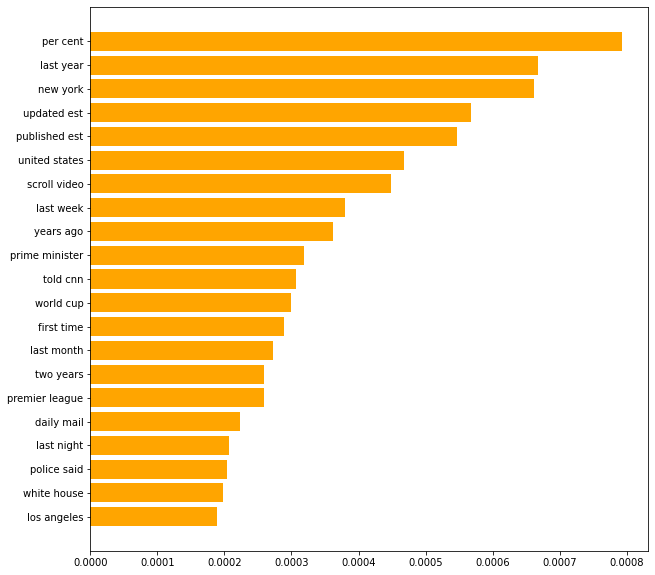

In [ ]:
visualize_ngrams_topn(bigram_scored,20)

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens)

# removing punctuation, non - aplhabetical tokens
finder.apply_word_filter(alpha_filter)

# removing stop words
finder.apply_word_filter(lambda w: w in nltk_stops)

trigram_scored = finder.score_ngrams(trigram_measures.raw_freq)
trigram_scored[:20]

[(('daily', 'mail', 'reporter'), 0.00014190682624763207),
 (('reporter', 'published', 'est'), 0.00010795599953784914),
 (('president', 'barack', 'obama'), 0.00010590559848655607),
 (('mail', 'reporter', 'published'), 9.698873810070015e-05),
 (('new', 'york', 'city'), 9.374624341493437e-05),
 (('updated', 'est', 'january'), 5.9032476779088886e-05),
 (('two', 'years', 'ago'), 5.888942554295216e-05),
 (('updated', 'est', 'november'), 5.531314463953401e-05),
 (('updated', 'est', 'october'), 5.46932559496082e-05),
 (('published', 'est', 'january'), 5.426410224119802e-05),
 (('est', 'january', 'updated'), 5.421641849581911e-05),
 (('january', 'updated', 'est'), 5.421641849581911e-05),
 (('updated', 'est', 'december'), 5.350116231513548e-05),
 (('est', 'october', 'updated'), 5.3215059842862034e-05),
 (('october', 'updated', 'est'), 5.3215059842862034e-05),
 (('published', 'est', 'october'), 5.3215059842862034e-05),
 (('updated', 'est', 'march'), 5.3119692352104214e-05),
 (('est', 'november', 

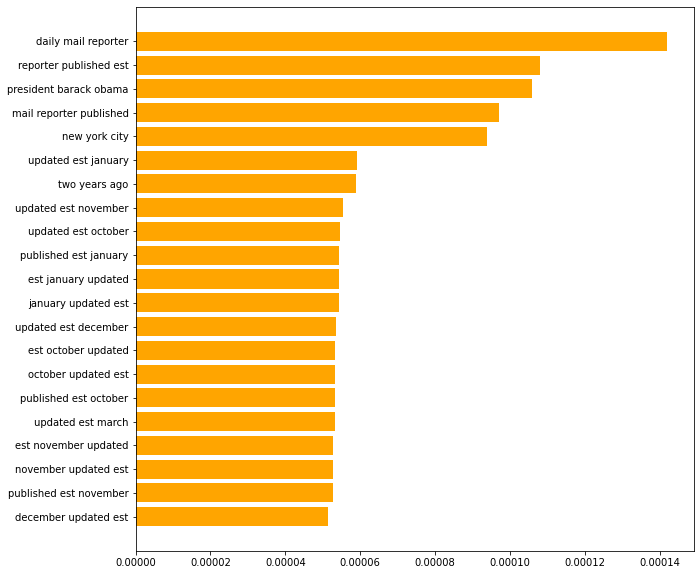

In [ ]:
visualize_ngrams_topn(trigram_scored,20)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(np.array(news_df['article']),np.array(news_df['highlights']),
                                               test_size=0.1,random_state=0,shuffle=True)


In [115]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((51680,), (5743,), (51680,), (5743,))

In [53]:
X_train[0]

'(cnn) -- a russian cargo ship reported to be carrying arms to syria is turning back, britain\'s top diplomat said tuesday. "i am pleased that the ship that was reported to be carrying arms to syria has turned back apparently towards russia," british foreign secretary william hague told the house of commons. u.s. officials have said that the russian operator femco\'s cargo ship, mv alaed, was headed for syria with attack helicopters and munitions for the al-assad regime from the port of kaliningrad. the vessel had been off the north coast of scotland, according to ship tracking data. hague commented on a ship during questions about the fighting in syria during a wide-ranging house of commons question-and-answer session about foreign policy. he didn\'t name the vessel. syrian opposition uniting to topple al-assad . he mentioned the status of the ship when asked whether "every peaceful diplomatic effort is being made to prevent the syrian government from getting its hands on weapons that

In [55]:
Y_train[0]

'uk foreign secretary william hague says the ship appears to be headed toward russia .\nhe said britain is discouraging anyone from supplying arms to syria .\nchemical weapons in syria are a concern, hague said .\nhe says focus is on peaceful transition, but "we cannot take any options off the table"'

# 4. Word Embedding

In [57]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences


In [112]:
voc_size = unique_tokens
embedding_width = 300
max_sum_len=63
max_text_len=600


In [116]:
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in X_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
X_tokenizer=Tokenizer(num_words=tot_cnt)
X_tokenizer.fit_on_texts(list(X_train))
X_train_seq = X_tokenizer.texts_to_sequences(X_train)
X_test_seq=X_tokenizer.texts_to_sequences(X_test)
X_train=pad_sequences(X_train_seq,maxlen=max_text_len,padding='post')
X_test= pad_sequences(X_test_seq,maxlen=max_text_len,padding='post')   
X_voc=X_tokenizer.num_words +1
    
Y_tokenizer = Tokenizer()
Y_tokenizer.fit_on_texts(list(Y_train))
thresh=6
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in Y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
Y_tokenizer=Tokenizer(num_words=(tot_cnt))
Y_tokenizer.fit_on_texts(list(Y_train))
Y_train_seq = Y_tokenizer.texts_to_sequences(Y_train)
Y_test_seq=Y_tokenizer.texts_to_sequences(Y_test)
Y_train=pad_sequences(Y_train_seq,maxlen=max_sum_len,padding='post')
Y_test= pad_sequences(Y_test_seq,maxlen=max_sum_len,padding='post')  
Y_voc=Y_tokenizer.num_words +1
    
#print(Y_tokenizer.word_counts['sostok'],len(Y_train))
    


In [117]:
ind=[]
for i in range(len(Y_train)):
    cnt=0
    for j in Y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

Y_train=np.delete(Y_train,ind, axis=0)
X_train=np.delete(X_train,ind, axis=0)
    
ind=[]
for i in range(len(Y_test)):
    cnt=0
    for j in Y_test[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

Y_test=np.delete(Y_test,ind, axis=0)
X_test=np.delete(X_test,ind, axis=0)

In [123]:
# Now grab the GloVe embeddings we will need: Takes about a minute to download.
# Then it take about another minute to fill the data structure.
# Note that the zip file with the embeddings is hosted in Dropbox. If this does
# not work, it could be downloaded from the GloVe website and uploaded to the
# file store for the VM running this notebook.

!wget https://www.dropbox.com/s/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip?dl=1
!unzip glove.twitter.27B.100d.txt.zip?dl=1

print("Loading word embeddings...")
embeddings_index = dict() # Initialize an empty dictionary
embedding_dir = 'glove.twitter.27B.100d.txt'

f = open(embedding_dir,encoding="utf8")
for line in f:
    values = line.split() # Split the line on white space
    word = values[0] # This is the word, so use it as the key
    coefs = np.asarray(values[1:], dtype='float32') # Here are the values for each dimension of the vector for this word
    embeddings_index[word] = coefs # Add to the dictionary
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

--2022-04-11 23:48:16--  https://www.dropbox.com/s/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip [following]
--2022-04-11 23:48:16--  https://www.dropbox.com/s/dl/ewfdwppopt3pild/glove.twitter.27B.100d.txt.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e2c4cda466ee609dbc2d3abcc.dl.dropboxusercontent.com/cd/0/get/BjP4HbB1L_9pqywx2Iq9cU0oktIlXSsOD_SLoPUDy67v1Idruq0ZerhQo_elhS-20vNgRpLDel-IPdcxcbXy_4oRh61Yu9W7BRlwKKC7y05UtX3qTZf14yTrY6ee1Zpaz5LOdxhyK80GOxHhn4R0fbXAUOgzcL0Pns4B5eTMKRF97g/file?dl=1# [following]
--2022-04-11 23:48:16--  https://uc5e2c4cda466ee609dbc2d3abcc.dl.dropboxusercontent.com/cd/0/get/BjP4HbB1L_9p

In [124]:
# Fill our matrix value with zeroes. A vector of zeroes will be the default
# if we don't match a token with the gloVe vocabulary.
embeddings_index = {}

word_index = X_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print("done")

done


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Input,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed


In [127]:
def model(embedding_matrix):
    from keras import backend as k
    k.clear_session()
    
    encoder_inputs=Input(shape=(max_text_len,))
    encoder_emb=Embedding(X_voc,embedding_width,weights=[embedding_matrix],trainable=True)(encoder_inputs)
    encoder_lstm1 = LSTM(300,return_sequences=True,return_state=True)
    encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)
    encoder_lstm2 = LSTM(300,return_sequences=True,return_state=True)
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
    encoder_lstm3=LSTM(300, return_state=True, return_sequences=True)
    encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)


    decoder_inputs = Input(shape=(None,))
    dec_emb_layer = Embedding(Y_voc, embedding_width,trainable=True)
    dec_emb = dec_emb_layer(decoder_inputs)
    decoder_lstm = LSTM(300, return_sequences=True, return_state=True)
    decoder_outputs,decoder_fwd_state, decoder_back_state =decoder_lstm(dec_emb,initial_state=[state_h, state_c])
    decoder_dense =TimeDistributed(Dense(Y_voc, activation='softmax'))
    decoder_outputs =decoder_dense(decoder_outputs)

# Define the model 
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    model.summary()
    return model,encoder_inputs,encoder_outputs,state_h,state_c,decoder_inputs,dec_emb_layer,decoder_lstm,decoder_dense

In [128]:
m,encoder_inputs,encoder_outputs,state_h,state_c,decoder_inputs,dec_emb_layer,decoder_lstm,decoder_dense=model(embedding_matrix)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 600, 300)     93799500    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 600, 300),   721200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [132]:
m.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

#history=model.fit([X_train,Y_train[:,:-1]],Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([X_test,Y_test[:,:-1]],Y_test.reshape(Y_test.shape[0],Y_test.shape[1], 1)[:,1:]))
history=m.fit([X_train,Y_train[:,:-1]], 
                      Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)
                      [:,1:] ,epochs=50,callbacks=[es],
                      batch_size=128, validation_data=([X_test,Y_test[:,:-1]],
                                                       Y_test.reshape(Y_test.shape[0],Y_test.shape[1], 1)[:,1:]))

Epoch 1/50


ResourceExhaustedError: ignored

In [ ]:
model.predict(embedded_docs)[0]

# 5. LSTM Model